# 1. Straight-forward

In [1]:
import numpy as np

def to_decimal(digits,int_len):
    if int_len <= len(digits):
        pos_exponents = np.arange(0, int_len, dtype=float)[::-1]
        neg_exponents = -np.arange(1, len(digits)-int_len+1, dtype=float)
        exponents = np.concatenate((pos_exponents,neg_exponents))
        return np.sum(digits*np.power([2],exponents))
    else:
        print("Invalid arguments")        

In [2]:
from itertools import product

n = 6
integer_len = 3
digits_list = list(product([0,1],repeat=n))

print(digits_list)

all_numbers = np.array([to_decimal(list(x),integer_len) for x in digits_list])
print(all_numbers)


[(0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1), (0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 1, 0), (0, 0, 0, 1, 1, 1), (0, 0, 1, 0, 0, 0), (0, 0, 1, 0, 0, 1), (0, 0, 1, 0, 1, 0), (0, 0, 1, 0, 1, 1), (0, 0, 1, 1, 0, 0), (0, 0, 1, 1, 0, 1), (0, 0, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1), (0, 1, 0, 0, 0, 0), (0, 1, 0, 0, 0, 1), (0, 1, 0, 0, 1, 0), (0, 1, 0, 0, 1, 1), (0, 1, 0, 1, 0, 0), (0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1), (0, 1, 1, 0, 0, 0), (0, 1, 1, 0, 0, 1), (0, 1, 1, 0, 1, 0), (0, 1, 1, 0, 1, 1), (0, 1, 1, 1, 0, 0), (0, 1, 1, 1, 0, 1), (0, 1, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1), (1, 0, 0, 0, 0, 0), (1, 0, 0, 0, 0, 1), (1, 0, 0, 0, 1, 0), (1, 0, 0, 0, 1, 1), (1, 0, 0, 1, 0, 0), (1, 0, 0, 1, 0, 1), (1, 0, 0, 1, 1, 0), (1, 0, 0, 1, 1, 1), (1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1), (1, 0, 1, 0, 1, 0), (1, 0, 1, 0, 1, 1), (1, 0, 1, 1, 0, 0), (1, 0, 1, 1, 0, 1), (1, 0, 1, 1, 1, 0), (1, 0, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0), (1, 1, 0, 0, 0, 1),

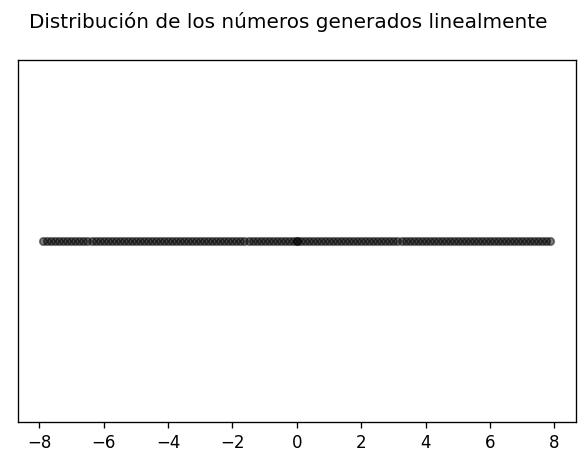

In [40]:
import matplotlib.pyplot as plt

all_numbers = np.concatenate((-all_numbers,all_numbers))

n = all_numbers.shape[0]

plt.figure(dpi=120)
plt.suptitle("Distribución de los números generados linealmente")
plt.scatter(all_numbers,n*[0],s=20,alpha=0.5,color='black')
plt.yticks([])
plt.show()

# 2. Con Mantisa y Exponente

In [17]:
from itertools import product
import numpy as np

def mantisa(a,b):
    return a*(2**(-1))+b*(2**(-2))

def exponente(s,a,b):
    if s==0:
        return 2*a+b
    elif s==1:
        return -(2*a+b)

mantisas = [(1,0),(1,1)]
exponentes = list(product([0,1],repeat=3))

print(exponentes)
print(mantisas)

all_numbers = []
for pair in product(mantisas,exponentes):
    all_numbers.append(mantisa(*pair[0])*(2**exponente(*pair[1])))
    all_numbers.append(-mantisa(*pair[0])*(2**exponente(*pair[1])))

all_numbers = np.unique(np.sort(all_numbers))

print(all_numbers)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(1, 0), (1, 1)]
[-6.      -4.      -3.      -2.      -1.5     -1.      -0.75    -0.5
 -0.375   -0.25    -0.1875  -0.125   -0.09375 -0.0625   0.0625   0.09375
  0.125    0.1875   0.25     0.375    0.5      0.75     1.       1.5
  2.       3.       4.       6.     ]


In [18]:
for x in all_numbers:
    print(x,end=', ')

-6.0, -4.0, -3.0, -2.0, -1.5, -1.0, -0.75, -0.5, -0.375, -0.25, -0.1875, -0.125, -0.09375, -0.0625, 0.0625, 0.09375, 0.125, 0.1875, 0.25, 0.375, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 4.0, 6.0, 

In [19]:
diffs = np.ediff1d(all_numbers)

print("Diferencias entre consecutivos:")
print(diffs)

Diferencias entre consecutivos:
[2.      1.      1.      0.5     0.5     0.25    0.25    0.125   0.125
 0.0625  0.0625  0.03125 0.03125 0.125   0.03125 0.03125 0.0625  0.0625
 0.125   0.125   0.25    0.25    0.5     0.5     1.      1.      2.     ]


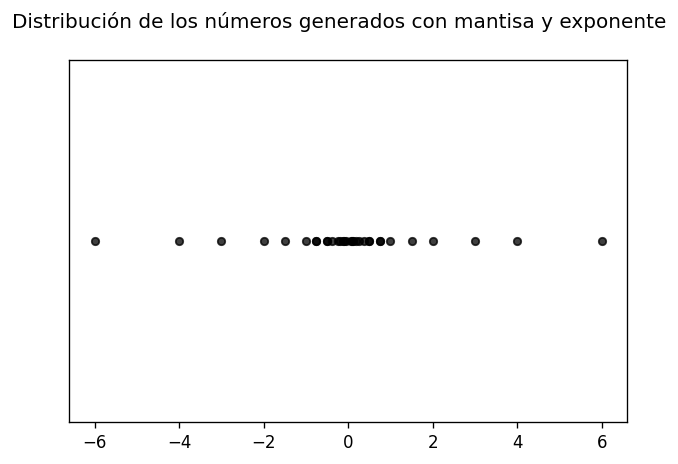

In [11]:
import matplotlib.pyplot as plt

all_numbers = np.concatenate((-all_numbers,all_numbers))

n = all_numbers.shape[0]

plt.figure(dpi=120)
plt.suptitle("Distribución de los números generados con mantisa y exponente")
plt.scatter(all_numbers,n*[0],s=20,alpha=0.5,color='black')
plt.yticks([])
plt.show()

In [24]:
errors = []

for j,dx in enumerate(diffs):
    error = abs(dx)/abs(all_numbers[j+1])
    errors.append(error)
    
for j,(x,y) in enumerate(zip(errors,diffs)):
    print(all_numbers[j],all_numbers[j+1],x,y)

-6.0 -4.0 0.5 2.0
-4.0 -3.0 0.3333333333333333 1.0
-3.0 -2.0 0.5 1.0
-2.0 -1.5 0.3333333333333333 0.5
-1.5 -1.0 0.5 0.5
-1.0 -0.75 0.3333333333333333 0.25
-0.75 -0.5 0.5 0.25
-0.5 -0.375 0.3333333333333333 0.125
-0.375 -0.25 0.5 0.125
-0.25 -0.1875 0.3333333333333333 0.0625
-0.1875 -0.125 0.5 0.0625
-0.125 -0.09375 0.3333333333333333 0.03125
-0.09375 -0.0625 0.5 0.03125
-0.0625 0.0625 2.0 0.125
0.0625 0.09375 0.3333333333333333 0.03125
0.09375 0.125 0.25 0.03125
0.125 0.1875 0.3333333333333333 0.0625
0.1875 0.25 0.25 0.0625
0.25 0.375 0.3333333333333333 0.125
0.375 0.5 0.25 0.125
0.5 0.75 0.3333333333333333 0.25
0.75 1.0 0.25 0.25
1.0 1.5 0.3333333333333333 0.5
1.5 2.0 0.25 0.5
2.0 3.0 0.3333333333333333 1.0
3.0 4.0 0.25 1.0
4.0 6.0 0.3333333333333333 2.0


In [7]:
from math import sqrt

def raices(a,b,c):
    disc = sqrt(b*b - 4*a*c)
    return ((-b+disc)/(2*a),(-b-disc)/(2*a))

In [22]:

a = 1
b = 3000.001
c = 3

sols = raices(a,b,c)
print(sols)

(-0.0009999999999763531, -3000.0)


In [12]:
reales = (-0.001,-3000)

errores = []

for j in range(2):
    errores.append(100*abs((sols[j]-reales[j])/reales[j]))

print(*errores)

2.3646883062777846e-09 0.0


In [2]:
x = 1
y = 0.0000001

n = 10000

print("Opción 1:")
resultado1 = x+n*y
print(resultado1)

print("Opción 2:")
resultado2 = x
for j in range(n):
    resultado2 += y
print(resultado2)

print("Opción 3:")
resultado3 = 0
for j in range(n):
    resultado3 += y
resultado3 += x
print(resultado3)

Opción 1:
1.001
Opción 2:
1.0010000000005839
Opción 3:
1.0009999999999997


In [21]:
real = resultado1

def error_relativo(real,aprox):
    return abs(real-aprox)/abs(real)

print(f"Opción 1: {error_relativo(real,resultado1)}")
print(f"Opción 2: {error_relativo(real,resultado2)}")
print(f"Opción 3: {error_relativo(real,resultado3)}")

Opción 1: 0.0
Opción 2: 5.833939170357966e-13
Opción 3: 2.2182278214288845e-16


## Error de dispersión

In [24]:
import numpy as np
from math import factorial

x = 10
resultado = 0
for j in range(30):
    resultado += x**j/factorial(j)
print(f"real: {np.exp(x)}, aproximado: {resultado}")

x = -10
resultado = 0
for j in range(30):
    resultado += x**j/factorial(j)
print(f"real: {np.exp(x)}, aproximado: {resultado}")

real: 22026.465794806718, aproximado: 22026.460266271286
real: 4.5399929762484854e-05, aproximado: -0.0027996460492138685
